In [32]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def assign(point, centroids, k):
  return min(range(k), key=lambda i: np.dot(centroids[i]-point, centroids[i]-point))


def compute_centroids(assignments, points, k):
  vec_sum = [np.zeros(len(points[0])) for _ in range(k)]
  counts = [0] * k
  for i, p in zip(assignments, points):
    vec_sum[i] += p
    counts[i] += 1
  return [vec_sum[i]/counts[i] if counts[i] > 0 else random.choice(points) for i in range(k)]


def kmeans(k, points):
  prev_assignment = []
  # 1. 임의로 k개의 점을 중심점으로 선택 (forgy)
  centroids = points[np.random.choice(points.shape[0], replace=False, size=k)]
  for epoch in range(10):
  # 2. 각 점이 할당될 중심점을 계산
    assignments = [assign(p, centroids, k) for p in points]
  # 3. 새로운 centroid 계산
    centroids = compute_centroids(assignments, points, k)
  # 4. 클러스터에 변화가 없을 경우 종료
    if prev_assignment == assignments:
      break
    prev_assignment = assignments
  return assignments, centroids

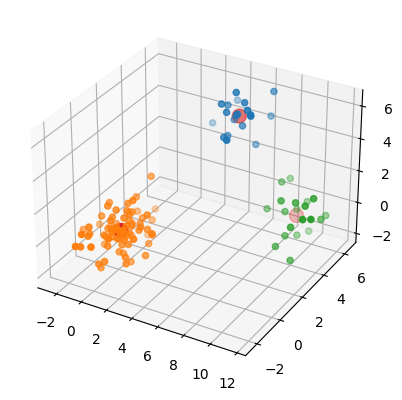

In [43]:
# 테스트

# 데이터 생성
k = 3
points1 = np.random.randn(80, k)
points2 = np.random.randn(20, k) + np.array([5, 5, 5])
points3 = np.random.randn(20, k) + np.array([10, 5, 0])
points = np.concatenate( (points1, points2, points3) )
# kmeans 실행
assignments, centroids = kmeans(k, points)

# 결과 확인
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
clusters = [[] for _ in range(k)]
for a, p in zip(assignments, points):
  clusters[a].append(p)
for cluster in clusters:
  ax.scatter(*zip(*cluster))
ax.scatter(*zip(*centroids), s=100)
plt.show()

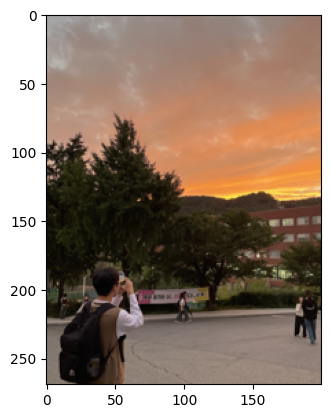

In [24]:
from PIL import Image
# 사진 불러오기 & 크기 조절 & 화면에 출력
im = Image.open("/content/drive/MyDrive/KakaoTalk_20230923_144207519.jpg")
width = 200
height = im.height * width // im.width
im = im.resize((width, height))
plt.imshow(im)
plt.show()

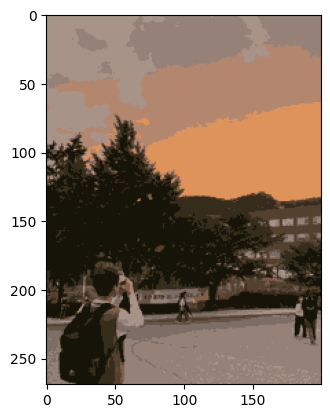

In [26]:
# 데이터 준비 & k-means 알고리즘 적용
pixels = np.array(im).reshape(-1,3)
assignments, centroids= kmeans(10, pixels)
# 모든 픽셀의 색을 centroid중 하나로 선택
for a, i in zip(assignments, range(pixels.shape[0])):
  pixels[i] = centroids[a]
# 바뀐 그림 출력
im_remastered = Image.fromarray(pixels.reshape(im.height, im.width, 3), 'RGB')
plt.imshow(im_remastered)
plt.show()

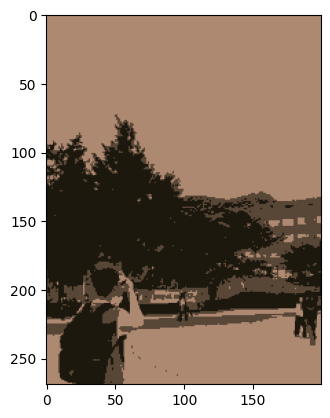

In [27]:
# 데이터 준비 & k-means 알고리즘 적용 3색으로
pixels = np.array(im).reshape(-1,3)
assignments, centroids= kmeans(3, pixels)
# 모든 픽셀의 색을 centroid중 하나로 선택
for a, i in zip(assignments, range(pixels.shape[0])):
  pixels[i] = centroids[a]
# 바뀐 그림 출력
im_remastered = Image.fromarray(pixels.reshape(im.height, im.width, 3), 'RGB')
plt.imshow(im_remastered)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


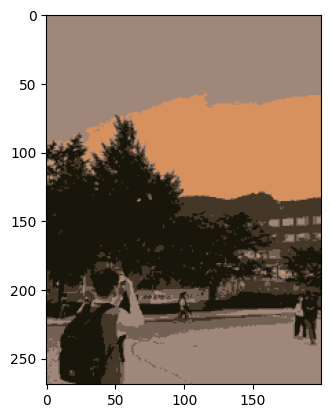

In [31]:
from sklearn.cluster import KMeans

# 데이터 준비 & k-means 알고리즘 적용
pixels = np.array(im).reshape(-1,3)

kmeans = KMeans(n_clusters=5)
kmeans.fit(pixels)
for a, i in zip(kmeans.labels_, range(pixels.shape[0])):
  pixels[i] = kmeans.cluster_centers_[a]

im_remastered = Image.fromarray(pixels.reshape(im.height, im.width, 3), 'RGB')
plt.imshow(im_remastered)
plt.show()